In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'assignment_2'))
	print(os.getcwd())
except:
	pass

c:\Users\Renjie Zhu\Documents\workspace\recommender_system\assignment_2


# Assignment 2 

In [5]:
from preprocessing import *

In [6]:
dataset = data_preprocessing()

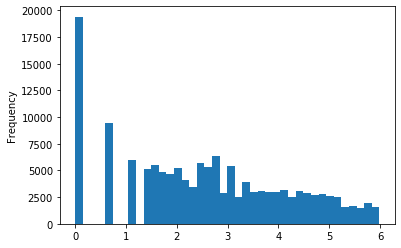

In [4]:
age_days = data['lncase_age_days']
age_days.plot.hist(bins=40)

In [5]:
closed_data = data.loc[data["status"].isin(["Closed"])]

In [6]:
closed_data = closed_data.loc[closed_data["district"].isin([1,2,3,4,5,6,7,8,9])].reset_index(drop=True)

### Process sentiment value for problem description

reference:

Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [7]:
neg = []
neu = []
com = []
pos = []
i=0

sid = SentimentIntensityAnalyzer()
for sentence in closed_data["public_description"]:
    if not isinstance(sentence, str):
        sentence = ""
    ss = sid.polarity_scores(sentence)
    neg.append(ss["neg"])
    neu.append(ss["neu"])
    com.append(ss["compound"])
    pos.append(ss["pos"])



In [8]:
closed_data["neg"] = neg
closed_data["neu"] = neu
closed_data["com"] = com
closed_data["pos"] = pos

In [9]:
closed_data["com"].describe()

count    125177.000000
mean         -0.079898
std           0.261256
min          -0.993800
25%          -0.012900
50%           0.000000
75%           0.000000
max           0.977100
Name: com, dtype: float64

In [10]:
closed_data.to_csv(os.getcwd()+"\closed_data.csv")

### Training validation and test split

In [11]:
def train_test_validation(closed_data, train_frac=0.8):
    """ 8:1:1 train, text ,validation split """
    train = closed_data.sample(frac=train_frac)
    remain = closed_data.drop(train.index)
    test = remain.sample(frac=0.5)
    validation = remain.drop(test.index)
    return train, test, validation